Modules/Packages

In [94]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, recall_score


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from joblib import dump, load

Question 1: Car Price prediction 

a) Conduct exploratory data analysis on the datasets. 

-read data set

In [13]:
cars_df = pd.read_csv('Car_Sales.csv')

In [14]:
cars_df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
119,120,1,plymouth cricket,gas,turbo,two,hatchback,fwd,front,93.7,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957.0
94,95,1,nissan leaf,gas,std,two,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299.0
62,63,0,mazda rx-4,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245.0
86,87,1,mitsubishi pajero,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8189.0
95,96,1,nissan juke,gas,std,two,hatchback,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7799.0
79,80,1,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689.0
137,138,2,saab 99e,gas,turbo,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0
39,40,0,honda prelude,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,8845.0


-explore

In [15]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [17]:
cars_df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [18]:
car_df = pd.read_csv('Car_sales.csv')

In [19]:
car_df.shape

(205, 26)

b) Check if there are any issues and clean accordingly. (5 marks)

In [20]:
cars_df.duplicated().sum()

0

In [21]:
car_df.dropna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


c) Analyse the relationships between price and the other features. What are your 
conclusions? (5 marks)

In [22]:
corr_matrix = cars_df[['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price'
]].corr()
corr_matrix

C:\Users\Cleggc04\AppData\Local\Temp\ipykernel_22440\3780220229.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ]].corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<Axes: >

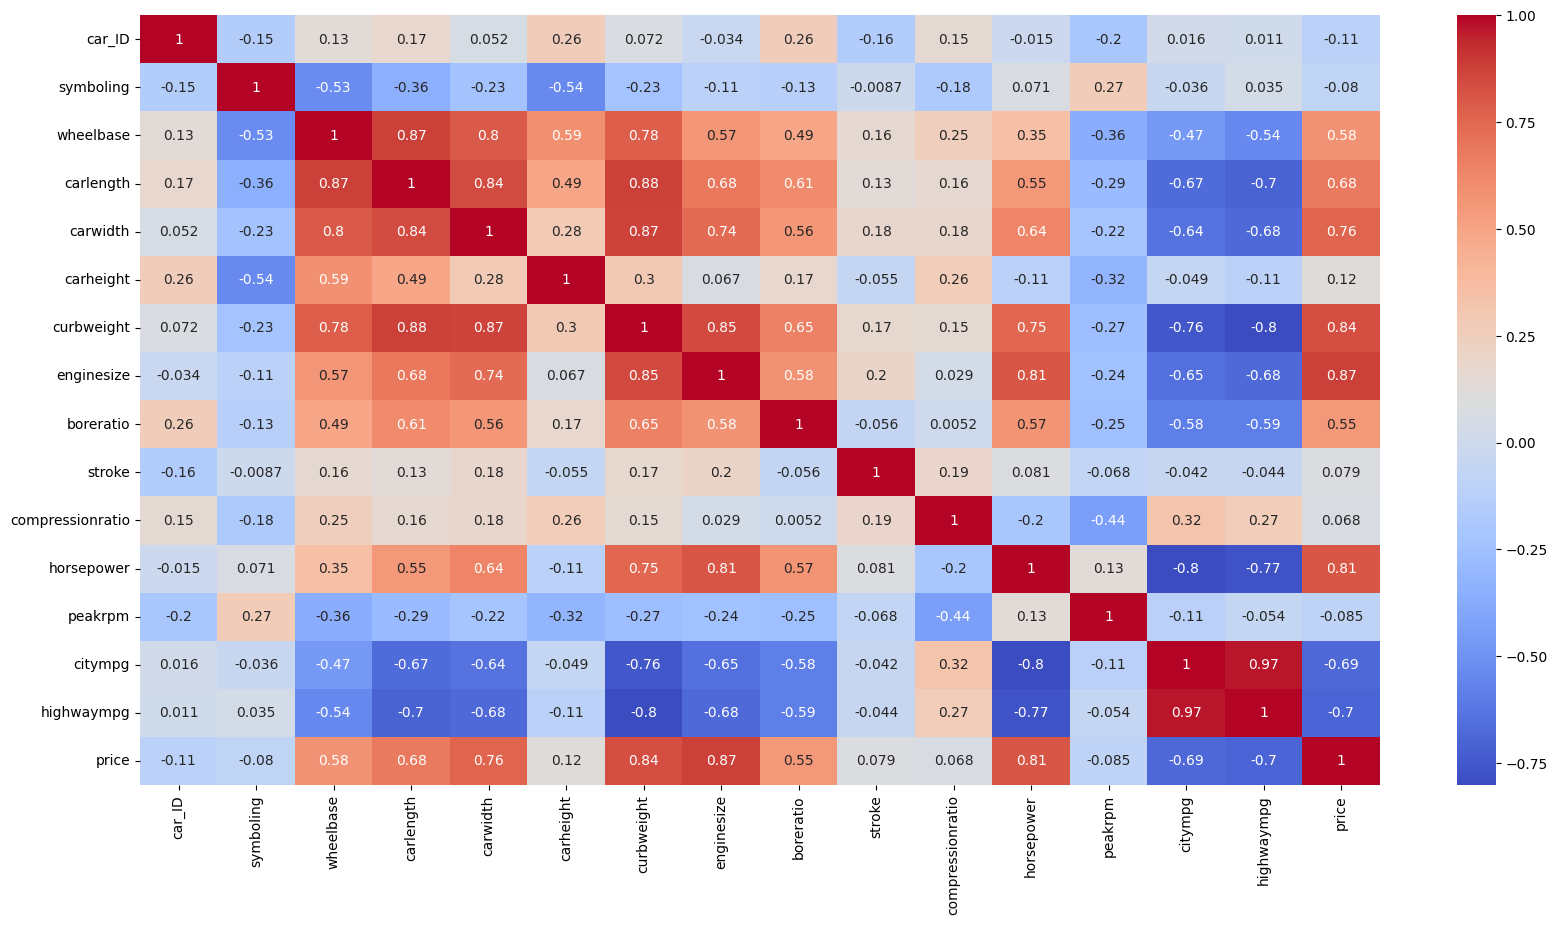

In [23]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

d) Build a predictive model to estimate car prices.

Predictive Model

processing 

Hot encode to deal with the categorical data

In [24]:
cars_df = pd.get_dummies(cars_df, columns=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

Split the dataset randomly into training and testing sets

In [25]:
X1 = cars_df.drop(columns=["price"])# Features without target
y1 = cars_df["price"] # Target variable (price)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

Select the top 3 most relevant features using SelectKBest and f_regression (Use of feature selection method)

In [26]:
selector = SelectKBest(score_func=f_regression, k=3)

Apply to X train and test

In [27]:
X_train = selector.fit_transform(X1_train, y1_train)
X_test = selector.transform(X1_test)

Train 3 different prediction models (Linear Regression, Decision Tree Regression, Random Forest Regression)

In [28]:
lr_reg = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

Fit model

In [29]:
lr_reg.fit(X_train, y1_train)
dt.fit(X_train, y1_train)
rf.fit(X_train, y1_train)

RandomForestRegressor()

Make predictions

In [30]:
lr_pred = lr_reg.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

Performance

In [31]:
# Evaluate the performance of each model using R-squared and RMSE
lr_reg_r2 = r2_score(y1_test, lr_pred)
lr_reg_rmse = np.sqrt(mean_squared_error(y1_test, lr_pred))
dt_r2 = r2_score(y1_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y1_test, dt_pred))
rf_r2 = r2_score(y1_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y1_test, rf_pred))

Performance Table

In [37]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'R-squared': [lr_reg_r2, dt_r2, rf_r2],
    'RMSE': [lr_reg_rmse, dt_rmse, rf_rmse]
})
print(results)

                      Model  R-squared         RMSE
0         Linear Regression   0.820813  3761.081564
1  Decision Tree Regression   0.900137  2807.773178
2  Random Forest Regression   0.947832  2029.371510


Visualisation

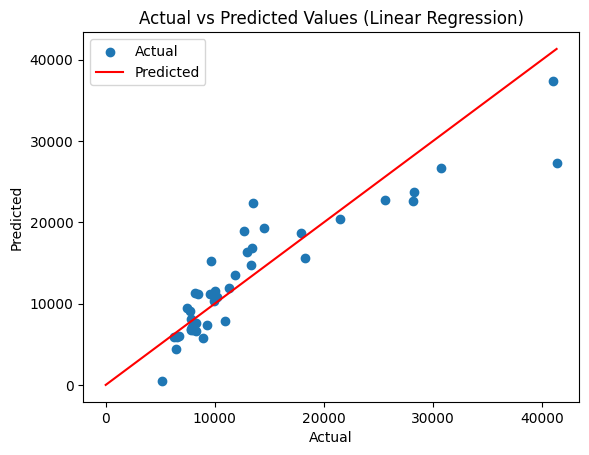

In [38]:
# Plot the actual vs predicted values for Linear Regression
plt.scatter(y1_test, lr_pred)
plt.plot(np.linspace(0, max(y1_test), 100), np.linspace(0, max(y1_test), 100), 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

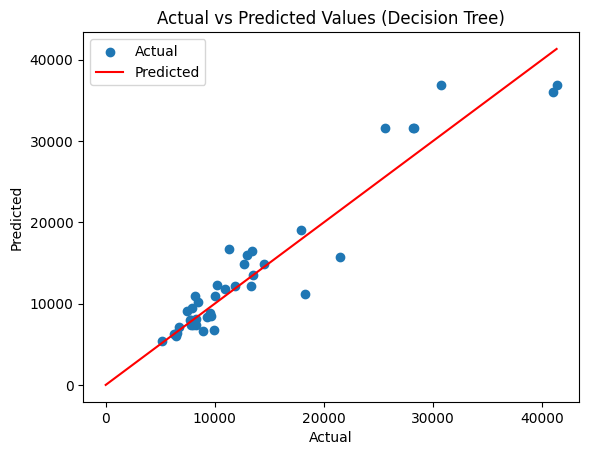

In [34]:
# Plot the actual vs predicted values for Decision Tree
plt.scatter(y1_test, dt_pred)
plt.plot(np.linspace(0, max(y1_test), 100), np.linspace(0, max(y1_test), 100), 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

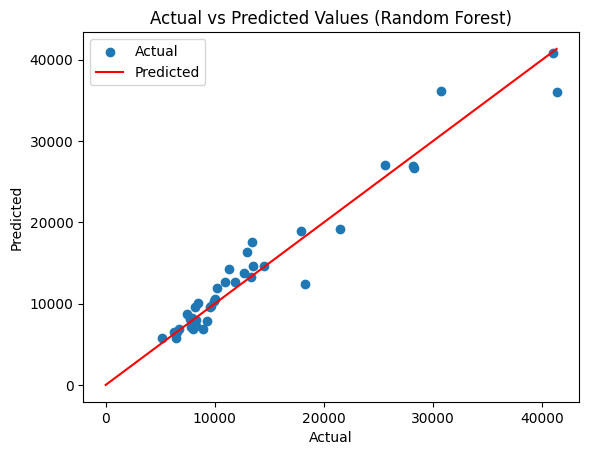

In [35]:
# Plot the actual vs predicted values for Random Forest
plt.scatter(y1_test, rf_pred)
plt.plot(np.linspace(0, max(y1_test), 100), np.linspace(0, max(y1_test), 100), 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend(labels = ('Actual','Predicted'),loc='upper left')
plt.show()

Save best model: M3 Random Forest

In [95]:
dump(rf, 'rf_model.joblib')

['rf_model.joblib']

Load model

In [96]:
#loaded_m3 = load('rf_model.joblib')

Question 2: Income Prediction Data

a) Conduct exploratory data analysis on the datasets. (2 marks)

-read data set

In [60]:
adult_train = pd.read_csv('adult.data')
adult_test = pd.read_csv('adult.test')

-explore

In [40]:
adult_test.sample(10)

,,,,,,,,,,,,,,|1x3 Cross validator
41,Private,219155,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Italy,<=50K.
26,Local-gov,345779,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,43,United-States,<=50K.
46,Private,118633,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,80,United-States,<=50K.
31,Private,422836,5th-6th,3,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,El-Salvador,<=50K.
52,Private,235567,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K.
27,Private,269246,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,3464,0,45,United-States,<=50K.
29,Private,94880,Some-college,10,Married-spouse-absent,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,<=50K.
25,Private,177423,HS-grad,9,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,4416,0,45,Philippines,<=50K.
44,Local-gov,185267,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,40,United-States,>50K.
27,Private,253814,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,38,United-States,<=50K.


In [41]:
adult_train.sample(10)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2407,45,Private,330535,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,3325,0,40,United-States,<=50K
22430,59,Private,138370,10th,6,Married-spouse-absent,Protective-serv,Not-in-family,Asian-Pac-Islander,Male,0,0,40,India,<=50K
17964,53,Private,153052,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
633,58,Self-emp-not-inc,35723,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K
26311,63,?,257659,Masters,14,Never-married,?,Not-in-family,White,Female,0,0,3,United-States,<=50K
2180,34,Private,244147,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
4572,21,Private,688355,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
18926,35,Private,322171,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,>50K
19480,23,Private,184271,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
20493,37,Private,355856,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Cambodia,>50K


In [42]:
adult_test.describe

<bound method NDFrame.describe of                                                                                                                                                      |1x3 Cross validator
25  Private      226802  11th         7   Never-married       Machine-op-inspct  Own-child       Black               Male   0    0 40  United-States               <=50K.
38  Private      89814   HS-grad      9   Married-civ-spouse  Farming-fishing    Husband         White               Male   0    0 50  United-States               <=50K.
28  Local-gov    336951  Assoc-acdm   12  Married-civ-spouse  Protective-serv    Husband         White               Male   0    0 40  United-States                >50K.
44  Private      160323  Some-college 10  Married-civ-spouse  Machine-op-inspct  Husband         Black               Male   7688 0 40  United-States                >50K.
18  ?            103497  Some-college 10  Never-married       ?                  Own-child       White              

In [43]:
adult_train.describe

<bound method NDFrame.describe of        39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-

b) Check if there are any issues and clean accordingly. (2 marks)

In [44]:
adult_train.duplicated().sum()

24

In [ ]:
adult_train[adult_train.duplicated(keep=False)]

,age (years),workclass,fnlwgt,education,education_num (years),marital-status,occupation,relationship,race,sex,capital gains,capital loss,hours-per-week,native-country,label
2302,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
3916,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,0
4324,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
4766,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,0
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
4939,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,1
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0
5578,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
5804,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
5841,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0


In [ ]:
adult_test.dtypes

|1x3 Cross validator    object
dtype: object

In [ ]:
adult_train.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [ ]:
adult_test.dtypes

|1x3 Cross validator    object
dtype: object

In [ ]:
adult_train.info

<bound method DataFrame.info of        39          State-gov   77516    Bachelors   13        Never-married  \
0      50   Self-emp-not-inc   83311    Bachelors   13   Married-civ-spouse   
1      38            Private  215646      HS-grad    9             Divorced   
2      53            Private  234721         11th    7   Married-civ-spouse   
3      28            Private  338409    Bachelors   13   Married-civ-spouse   
4      37            Private  284582      Masters   14   Married-civ-spouse   
...    ..                ...     ...          ...  ...                  ...   
32555  27            Private  257302   Assoc-acdm   12   Married-civ-spouse   
32556  40            Private  154374      HS-grad    9   Married-civ-spouse   
32557  58            Private  151910      HS-grad    9              Widowed   
32558  22            Private  201490      HS-grad    9        Never-married   
32559  52       Self-emp-inc  287927      HS-grad    9   Married-civ-spouse   

             Adm-cl

In [ ]:
adult_test.info

<bound method DataFrame.info of                                                                                                                                                      |1x3 Cross validator
25  Private      226802  11th         7   Never-married       Machine-op-inspct  Own-child       Black               Male   0    0 40  United-States               <=50K.
38  Private      89814   HS-grad      9   Married-civ-spouse  Farming-fishing    Husband         White               Male   0    0 50  United-States               <=50K.
28  Local-gov    336951  Assoc-acdm   12  Married-civ-spouse  Protective-serv    Husband         White               Male   0    0 40  United-States                >50K.
44  Private      160323  Some-college 10  Married-civ-spouse  Machine-op-inspct  Husband         Black               Male   7688 0 40  United-States                >50K.
18  ?            103497  Some-college 10  Never-married       ?                  Own-child       White               F

Training Data

-cleaning and processing

Add column names

In [61]:
adult_train.columns = ['age (years)', 'workclass', 'fnlwgt', 'education', 'education_num (years) ',	'marital-status', 'occupation',	'relationship',	'race',	'sex', 'capital gains', 'capital loss',	'hours-per-week', 'native-country',	'label']

The row that acted acted as a column is re inserted into the table as a row

In [ ]:
#extra_row = {'age (years)':'39',	'workclass':' State-gov',	'fnlwgt':'77516',	'education':' Bachelors',	'education_num (years)':'13',	'marital-status':' Never-married',	'occupation':' Adm-clerical',	'relationship': ' Not-in-family',	'race':' White', 'sex':' Male',	'capital gains':'2174',	'capital loss':'0',	'hours-per-week':'40',	'native-country': ' United-States',	'label': ' <=50K'}

In [ ]:
#adult_train = adult_train.append(extra_row, ignore_index=True)

Identify rows containing '?' values


In [62]:
search = adult_train.apply(lambda x: x.astype(str).str.contains('\?', regex=True)).any(axis=1)

Replace ' ?' values with NaN #Note there's whitespace before the ?. 

In [63]:
adult_train.loc[search] = adult_train.loc[search].replace(' ?', pd.NaT)

In [ ]:
#adult_train['native-country'] = adult_train['native-country'].replace(' ?', pd.NaT, regex=True)

Drop all missing values

In [64]:
adult_train = adult_train.dropna()

Drop unused columns

In [65]:
adult_train = adult_train.drop(columns=['fnlwgt'])

Change income values to 0 for <=50 and 1 for >50

In [66]:
adult_train['label'] = adult_train['label'].replace(' <=50K', 0)

In [67]:
adult_train['label'] = adult_train['label'].replace(' >50K', 1)

In [75]:
adult_test.columns = ['label']

In [79]:
adult_test['label'] = adult_test['label'].replace(' <=50K.', 0)

In [80]:
adult_test['label'] = adult_test['label'].replace(' >50K.', 1)

In [82]:
adult_test

,,,,,,,,,,,,,,label
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


c) Compare total income (labels) with the following attributes and state your conclusions: (6 marks)

Compare total income vs:
•	Age groups: 16-20, 21-30, 31-40, 41-50, 51-60, and 60+ 
•	Gender
•	Occupation


Age groups 16-20, 21-30, 31-40, 41-50, 51-60, and 60+ 

In [68]:
age_range = [16, 20, 30, 40, 50, 60, 100]
temp_df = pd.cut(adult_train['age (years)'], bins=age_range, labels=['16-20', '21-30', '31-40', '41-50', '51-60', '60-105'  ] )

In [70]:
temp_df = temp_df.to_frame(name='age (years)')

In [71]:
temp_df['sex'] = adult_train['sex']

In [72]:
temp_df['occupation'] = adult_train['occupation']

In [73]:
temp_df['income'] = adult_train['label']

In [74]:
count_of_bins = temp_df.groupby(['income']).size()

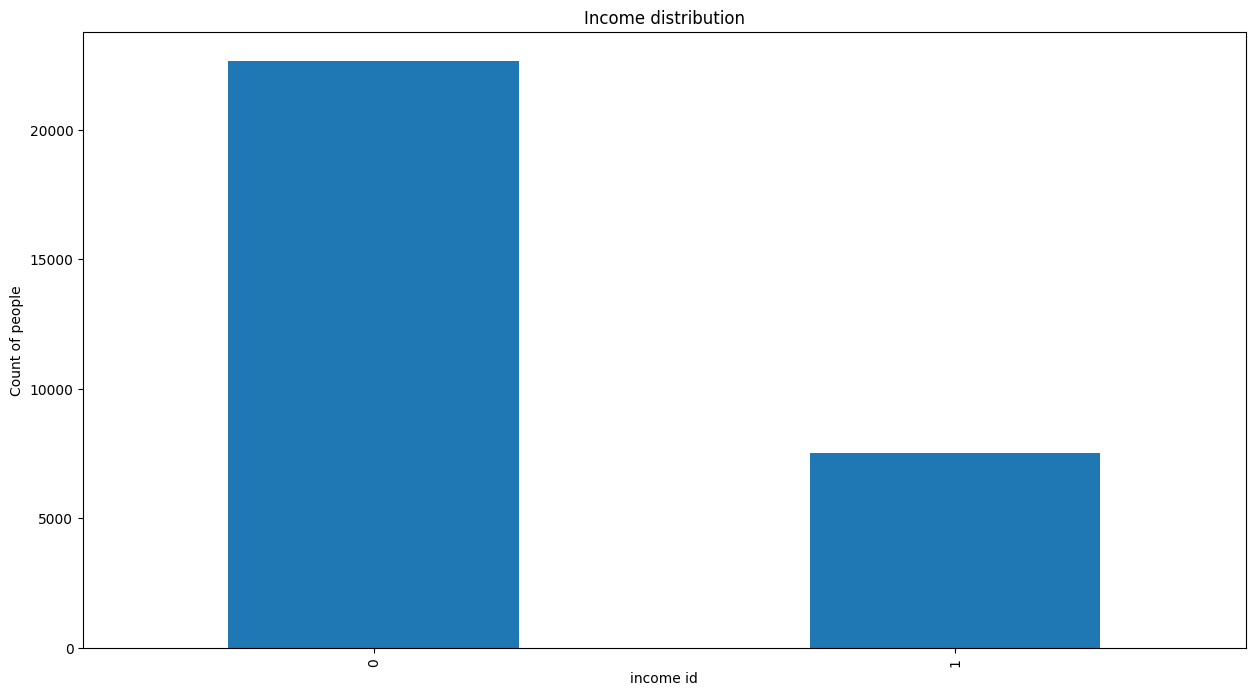

In [81]:
count_of_bins.plot(kind='bar',figsize=(15,8))
plt.title("Income distribution")
plt.xlabel("income id")
plt.ylabel("Count of people")
plt.show()

income by age_range

In [84]:
#income_by_age = pd.DataFrame(temp_df.groupby(['age (years)'])['income'].count()).reset_index()
income_by_age = temp_df.groupby(['age (years)','income']).size().unstack(fill_value=0)

In [85]:
income_by_age

income,0,1
age (years),,
16-20,1997,1
21-30,6939,660
31-40,5825,2337
41-50,4128,2582
51-60,2410,1476
60-105,1354,452


Visualise

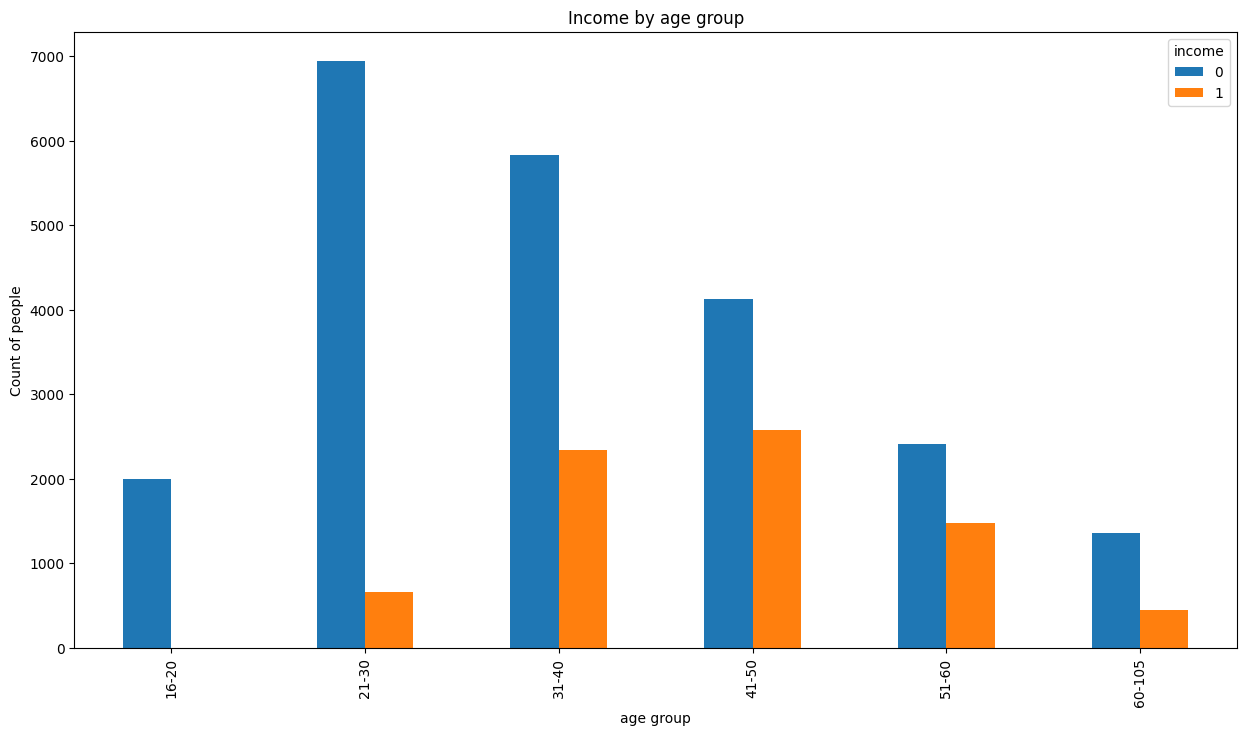

In [86]:
income_by_age.plot(kind='bar',figsize=(15,8))
plt.title("Income by age group")
plt.xlabel("age group")
plt.ylabel("Count of people")
plt.show()

income by gender

In [88]:
income_by_gender = temp_df.groupby(['sex','income']).size().unstack(fill_value=0)

In [89]:
income_by_gender

income,0,1
sex,,
Female,8670,1112
Male,13983,6396


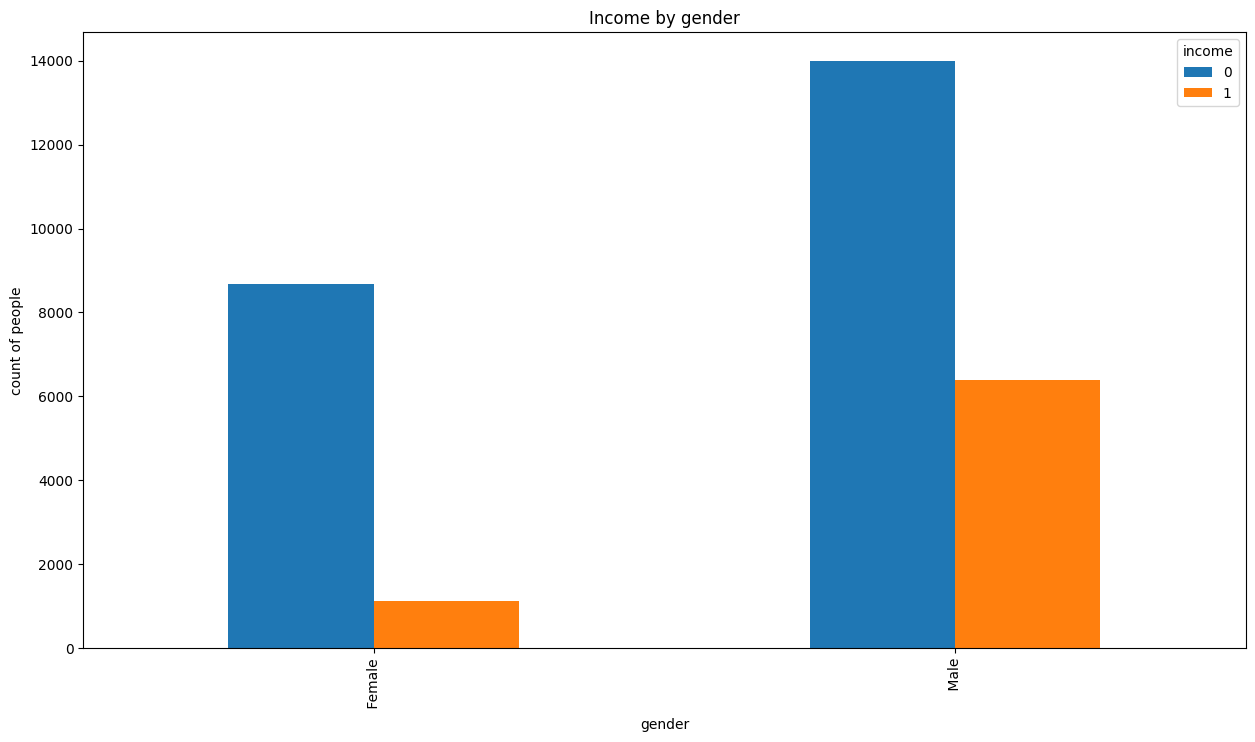

In [90]:
income_by_gender.plot(kind='bar',figsize=(15,8))
plt.title("Income by gender")
plt.xlabel("gender")
plt.ylabel("count of people")
plt.show()

income by occupation

In [91]:
income_by_occupation = temp_df.groupby(['occupation','income']).size().unstack(fill_value=0)

In [93]:
income_by_occupation

income,0,1
occupation,,
Adm-clerical,3222,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1721,245
Other-service,3080,132
Priv-house-serv,142,1


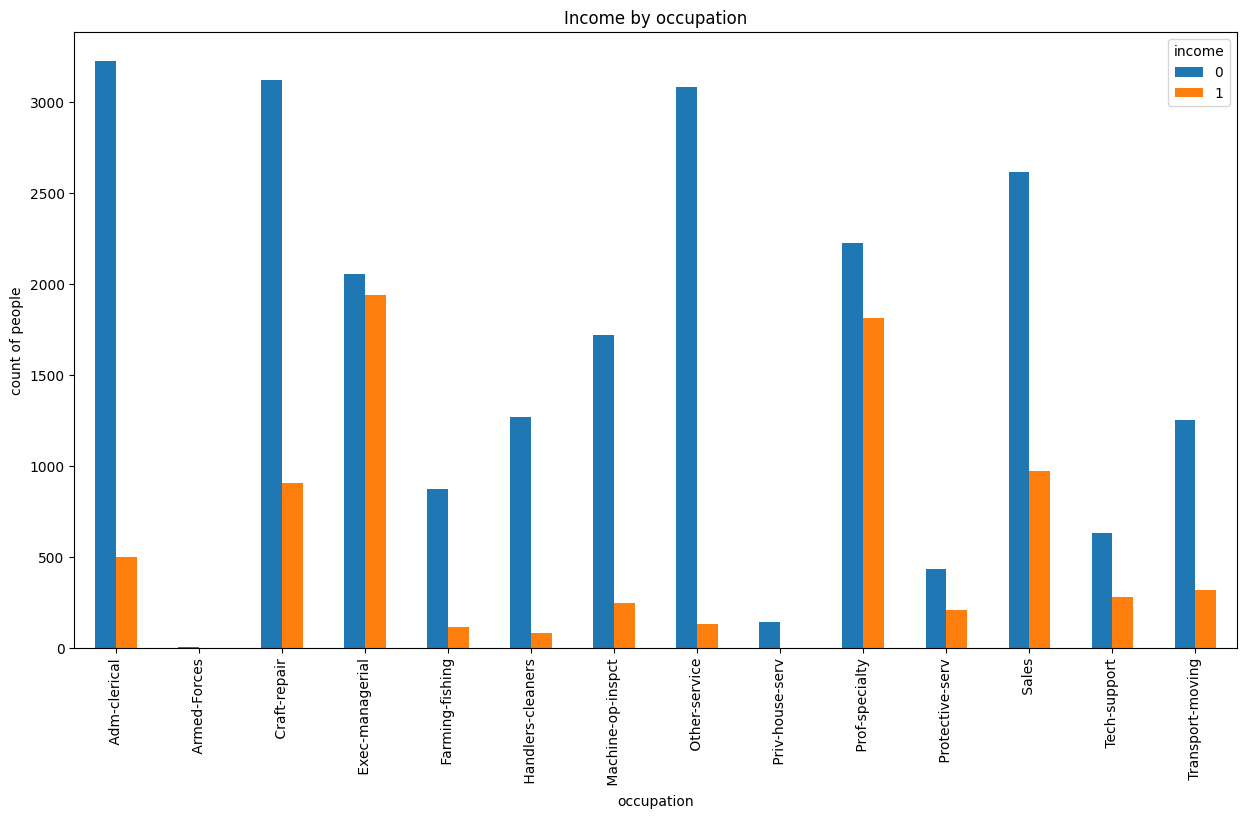

In [92]:
income_by_occupation.plot(kind='bar',figsize=(15,8))
plt.title("Income by occupation")
plt.xlabel("occupation")
plt.ylabel("count of people")
plt.show()

d) Build a classifier for income (labels) with relevant features: (20 marks)

Classification predictive models

Processing

In [ ]:
X = adult_train.drop(columns=["label"])
y = adult_train["label"]

Hot encode to deal with the categorical data

In [50]:
adult_train = pd.get_dummies(adult_train, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship' , 'race', 'sex' , 'native-country' ])

Standardize features by removing the mean and scaling to unit variance.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model 1 = KNeighborsClassifier

In [ ]:
# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

Evaluate the model with 10-fold cross-validation

In [ ]:
m1_score = cross_val_score(knn, X_scaled, y, cv=10)
m1_average_score = m1_score.mean()
print(f"Accuracy: {m1_average_score:.3f}")

Accuracy: 0.827


TPR

In [ ]:
m1_tpr = cross_val_score(knn, X_scaled, y, cv=10, scoring=make_scorer(recall_score) )
m1_average_tpr = m1_tpr.mean()
print(f"Accuracy: {m1_average_tpr:.3f}")

Accuracy: 0.581


Model 2 = Decision Tree Classification

Instantiate decision tree classifier

In [ ]:
tree_classifier = DecisionTreeClassifier()

Cross-validation and get the accuracy scores

In [ ]:
m2_score = cross_val_score(tree_classifier, X_scaled, y, cv=10)
m2_average_score = m2_score.mean()

Accuracy

In [ ]:
print(f"Accuracy: {m2_average_score:.3f}")

Accuracy: 0.822


TPR

In [ ]:
m2_tpr = cross_val_score(tree_classifier, X_scaled, y, cv=10,  scoring=make_scorer(recall_score))
m2_average_tpr = m2_tpr.mean()

In [ ]:
print(f"TPR: {m2_average_tpr:.3f}")

TPR: 0.618


Model 3 = Logistic Regression

Instantiate a logistic regression classifier

In [98]:
lg_reg = LogisticRegression()

cross-validation and get the accuracy scores

In [ ]:
m3_score = cross_val_score(lg_reg, X_scaled, y, cv=10)
m3_average_score = m3_score.mean()

Accuracy

In [ ]:
print(f"Accuracy: {m3_average_score:.3f}")

Accuracy: 0.851


TPR

In [ ]:
m3_tpr = cross_val_score(lg_reg, X_scaled, y, cv=10, scoring=make_scorer(recall_score))
m3_average_tpr = m3_tpr.mean()

In [ ]:
print(f"TPR: {m3_average_tpr:.3f}")

TPR: 0.601


Save best model

In [99]:
dump(lg_reg, 'lg_reg_model.joblib')

['lg_reg_model.joblib']

load model

In [100]:
#laod = load('lg_reg_model.joblib')

Misc

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out.csv') 

adult_train.to_csv('out.zip', index=True,
          compression= compression_opts)

In [ ]:
del average_score